# The matrix inverse

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
A=np.array([[1,4],[2,7]])
Ainv=np.linalg.inv(A)
A@Ainv
print(A), print(' ')
print(Ainv),print(' ')
print(A@Ainv)

[[1 4]
 [2 7]]
 
[[-7.  4.]
 [ 2. -1.]]
 
[[1. 0.]
 [0. 1.]]


In [8]:
# the full inverse is two-sided
print( A@Ainv ), print(' ')
print( Ainv@A )

[[1. 0.]
 [0. 1.]]
 
[[1. 0.]
 [0. 1.]]


In [9]:
# reminder to use the correct operator:
A*Ainv # Hadamard multiplication!

array([[-7., 16.],
       [ 4., -7.]])

In [10]:
# try again with a singular matrix
A = np.array([ [1,4],[2,8] ])

# its inverse
Ainv = np.linalg.inv(A)

# does it produce the identity matrix?
A@Ainv

LinAlgError: Singular matrix

# Inverse of a diagonal matrix

In [11]:
D = np.diag( np.arange(1,6) )
Dinv = np.linalg.inv(D)

print('The diagonal matrix:')
print(D), print(' ')

print('Its inverse:')
print(Dinv), print(' ')

print('Their product:')
print(D@Dinv)

The diagonal matrix:
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
 
Its inverse:
[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.        ]
 [-0.         -0.         -0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]
 
Their product:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# The left-inverse

In [19]:
# making an invertible square matrix from a tall full column-rank matrix

# here's a tall matrix.
T = np.random.randint(-10,11,size=(40,4))

# confirm that it has its maximum possible rank (full column-rank)
print( f'This matrix has rank={np.linalg.matrix_rank(T)}\n\n' )

# next, create a square full-rank matrix
TtT = T.T@T

# check whether it has an inverse
TtT_inv = np.linalg.inv(TtT)
print( np.round(TtT_inv@TtT,4) )

This matrix has rank=4


[[ 1. -0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0. -0.  1. -0.]
 [ 0. -0.  0.  1.]]


In [21]:
# finish creating the left-inverse

# our left-inverse
L = TtT_inv @ T.T

# confirm that it works
print( np.round( L@T,6 ) ), print(' ')

# but it's one-sided!
print( np.round( T@L,6 ) )


[[ 1. -0.  0. -0.]
 [ 0.  1.  0.  0.]
 [ 0. -0.  1. -0.]
 [-0.  0.  0.  1.]]
 
[[ 0.029876 -0.015453 -0.000954 ...  0.002424 -0.02641  -0.027933]
 [-0.015453  0.123528  0.049569 ... -0.004693  0.001429  0.025619]
 [-0.000954  0.049569  0.134146 ...  0.023222  0.036293 -0.053002]
 ...
 [ 0.002424 -0.004693  0.023222 ...  0.022911  0.009873 -0.020952]
 [-0.02641   0.001429  0.036293 ...  0.009873  0.039672  0.001577]
 [-0.027933  0.025619 -0.053002 ... -0.020952  0.001577  0.059334]]


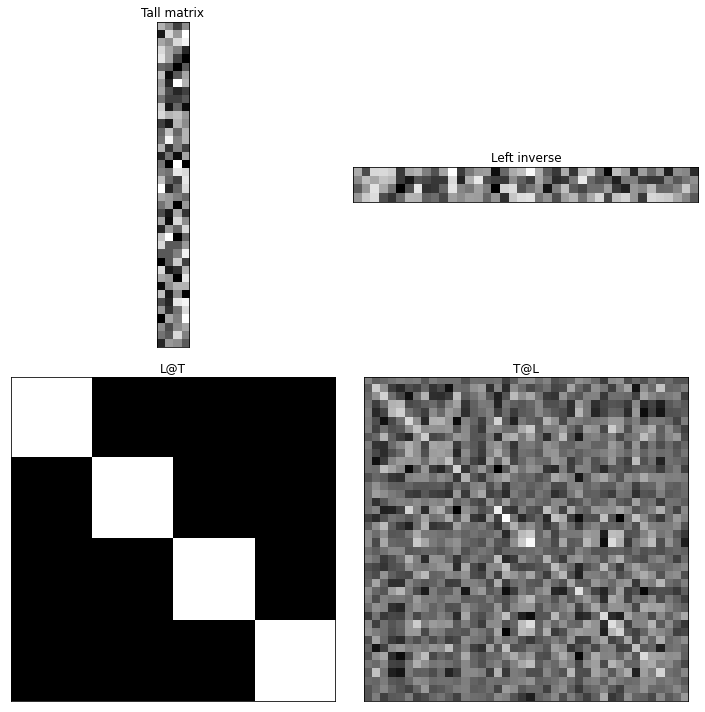

In [22]:
# visualize! of course :)

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(T,cmap='gray')
axs[0,0].set_title('Tall matrix')

axs[0,1].imshow(L,cmap='gray')
axs[0,1].set_title('Left inverse')

axs[1,0].imshow(L@T,cmap='gray')
axs[1,0].set_title('L@T')

axs[1,1].imshow(T@L,cmap='gray')
axs[1,1].set_title('T@L')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.savefig('Figure_08_04.png',dpi=300)
plt.show()

# The right-inverse

In [30]:
# Making an invertible matrix from a wide full row-rank matrix

# here's a wide matrix.
W = np.random.randint(-10,11,size=(4,40))

# confirm that it has its maximum possible rank (full row-rank)
print( f'This matrix has rank={np.linalg.matrix_rank(W)}\n\n' )

# next, create a square full-rank matrix
WWt = W@W.T

# check whether it has an inverse
WWt_inv = np.linalg.inv(WWt)
print( np.round(WWt_inv@WWt,4) )

This matrix has rank=4


[[ 1.  0.  0.  0.]
 [ 0.  1. -0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [31]:
# finish creating the right-inverse

# our right-inverse
R = W.T @ WWt_inv

# confirm that it works
print( np.round( W@R,6 ) ), print(' ')

# but it's one-sided!
print( np.round( R@W,6 ) )

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -0.]
 [ 0.  0. -0.  1.]]
 
[[ 0.07588  -0.008439  0.009368 ...  0.083399  0.024311 -0.060575]
 [-0.008439  0.043162  0.002744 ... -0.03583  -0.029536  0.03116 ]
 [ 0.009368  0.002744  0.089828 ...  0.06672   0.078274  0.020108]
 ...
 [ 0.083399 -0.03583   0.06672  ...  0.227086  0.01549  -0.143119]
 [ 0.024311 -0.029536  0.078274 ...  0.01549   0.173208  0.065731]
 [-0.060575  0.03116   0.020108 ... -0.143119  0.065731  0.146415]]


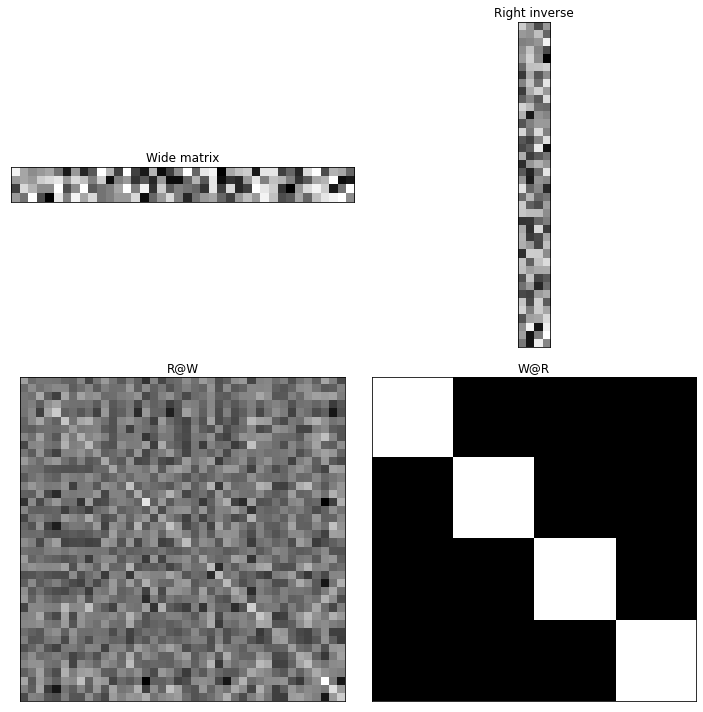

In [32]:
# visualize! 

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(W,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@W,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(W@R,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.show()

# MP pseudoinverse

In [23]:
# The same singular matrix as before
A = np.array([ [1,4],[2,8] ])

# its inverse
Apinv = np.linalg.pinv(A)
print(Apinv*85), print(' ')

# does it produce the identity matrix?
A@Apinv

[[1. 2.]
 [4. 8.]]
 


array([[0.2, 0.4],
       [0.4, 0.8]])

The rank of this matrix is 5.



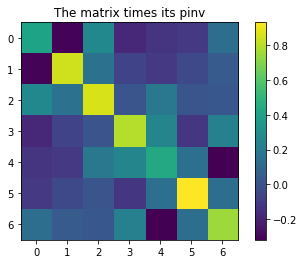

In [33]:
# an exmple with random numbers
A = np.random.randn(7,5) @ np.random.randn(5,7)
print(f'The rank of this matrix is {np.linalg.matrix_rank(A)}.\n')

Apinv = np.linalg.pinv(A)
plt.imshow(A@Apinv)
plt.title('The matrix times its pinv')
plt.colorbar()
plt.show()